# Исходные данные

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import svm

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('datasets/breast_cancer.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [5]:
diagnosis = df["diagnosis"].map({ 'B': 0, 'M': 1 })
diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [6]:
data = df.drop('Unnamed: 32',axis=1)
data = data.drop('id',axis=1)
data = data.drop('diagnosis',axis=1)
data["diagnosis"] = diagnosis
data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [8]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


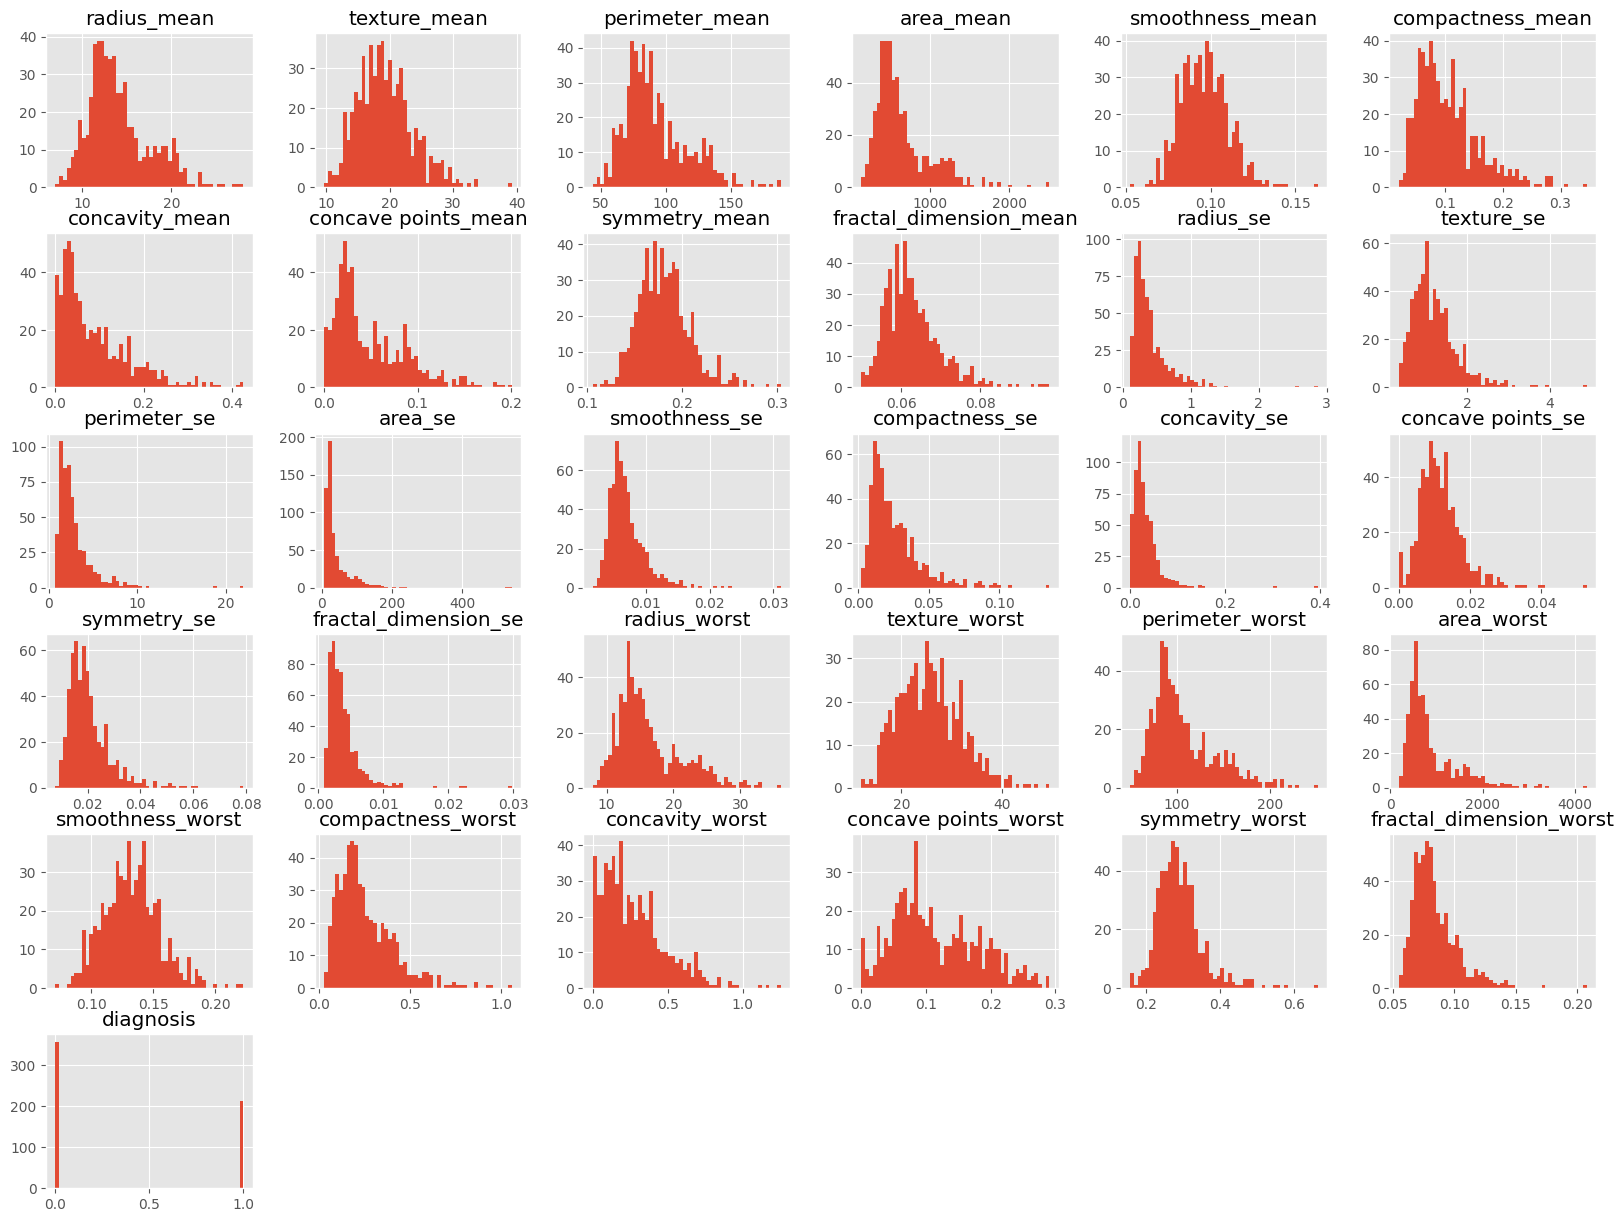

In [9]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [10]:
print("Предел значений среднего радиуса: [", data.radius_mean.min()," ; ", data.radius_mean.max(),"]")
print("Предел значений среднего периметра: [", data.perimeter_mean.min()," ; ", data.perimeter_mean.max(),"]")
print("Предел значений средней площади: [", data.area_mean.min()," ; ", data.area_mean.max(),"]")

Предел значений среднего радиуса: [ 6.981  ;  28.11 ]
Предел значений среднего периметра: [ 43.79  ;  188.5 ]
Предел значений средней площади: [ 143.5  ;  2501.0 ]


# Генерация тестовых наборов данных

In [11]:
def split_train_test(data,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(data,0.2)
print("Размер датасета для обучения:", len(train_set))
print("Размер датасета для теста:", len(test_set))

Размер датасета для обучения: 456
Размер датасета для теста: 113


In [12]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [13]:
data_with_id = data.reset_index()
train_set,test_set = split_train_test_by_id(data_with_id,0.2,"index")

In [14]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42 )

Разбиение графика средней площади на категории по области значений и отображение категорий в виде гистаграммы:

<AxesSubplot: >

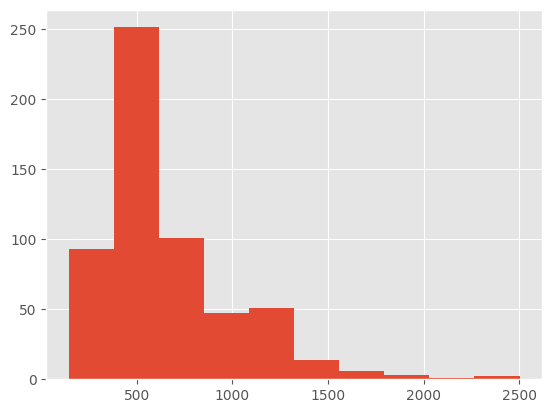

In [15]:
data.area_mean.hist()

In [16]:
data['area_category'] = pd.cut(data['area_mean'],bins=[0,500,1000,1500,2000, np.inf],labels=[0,500,1000,1500,2000])

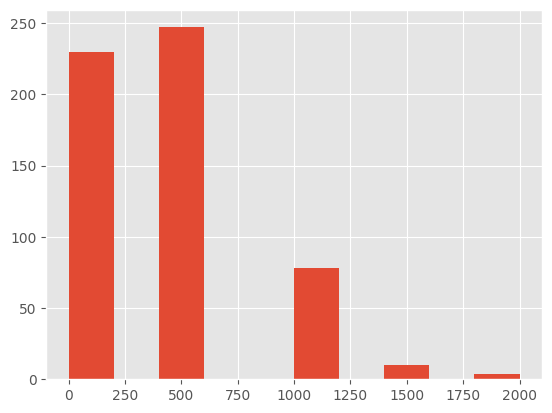

In [17]:
data.area_category.hist();

In [18]:
data['area_category']

0      1000
1      1000
2      1000
3         0
4      1000
       ... 
564    1000
565    1000
566     500
567    1000
568       0
Name: area_category, Length: 569, dtype: category
Categories (5, int64): [0 < 500 < 1000 < 1500 < 2000]

# Выявление зависимостей и корреляций

Стратификационная выборка:

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

In [21]:
for train_index, test_index in split.split(data,data['area_category']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[ 36  19 388 148 412 190 143 160 360 257 241 173 436 229 193 443 452 155
 368  29  96 214 124 152 259 197 491 137 230 236 222  79 147 209 269 233
 263 408 536 451  12 407  16 374 481 504 172  92 107  45  84  13 413 547
 112 187 204 208 350 134 422 156 467 101 283  56 154 183 266 531 505 202
  18 248 463 497 473 196 496 278  59  49  26 466 324 527 409 524 115  46
 144 298 164 308 265  35 382 290  69 486   3  31 401 243 189 416 118 285
 379 171 462 457 405 262 353 389 264 150 139   9 356 469  55 553 309  40
  23 366 104 511 447  52 277  32 396 484 563 333  14 513 343 301 550 354
 292 113 182 170 344 370  62  33 159 460 420 226 281 555 476  68 367 472
 315  28 167 414 435 464 532  25  95 395 418 161 186 286 138 305 100 199
 272 188 323 512 376 522  98 317 246 255 293  77  91 397 168 468 403 493
  89 399 174 381 201  27 123  86 212 373 559 386 499 375 548 450 162 533
 544 111 165 362 509  78 194 351 122 392 545 387 247 106 242 438  43 192
 325 215  39  48 142 424 185 103 120  11 357 203 26

In [22]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("area_category",axis=1,inplace=True)

In [23]:
data = strat_train_set.copy()

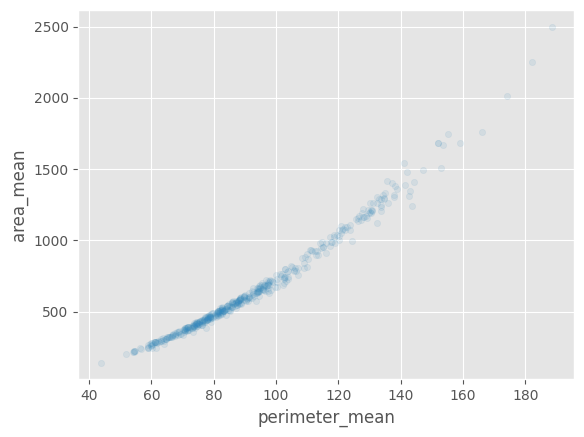

In [24]:
data.plot(kind='scatter',x='perimeter_mean',y='area_mean',alpha = 0.1);

Вычисление коффициентов корреляции для определения линейных связей:

In [25]:
corr_matrix = data.corr()
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_mean,1.000000,0.330322,0.997816,0.988806,0.159308,0.483575,0.663588,0.819619,0.134181,-0.333366,...,0.308934,0.963622,0.939414,0.129857,0.393133,0.518021,0.733997,0.168162,-0.006500,0.724423
texture_mean,0.330322,1.000000,0.335382,0.323125,-0.030452,0.220107,0.283566,0.282735,0.050209,-0.092518,...,0.911541,0.364633,0.352314,0.079983,0.254832,0.280561,0.284927,0.098161,0.105090,0.418988
perimeter_mean,0.997816,0.335382,1.000000,0.987570,0.196102,0.535588,0.703479,0.848251,0.170002,-0.283367,...,0.313498,0.968103,0.938581,0.160647,0.436370,0.555315,0.761334,0.194046,0.037818,0.737850
area_mean,0.988806,0.323125,0.987570,1.000000,0.172688,0.476340,0.672470,0.821880,0.135380,-0.304919,...,0.297004,0.957324,0.953869,0.135353,0.370410,0.504115,0.712762,0.149836,-0.011937,0.705724
smoothness_mean,0.159308,-0.030452,0.196102,0.172688,1.000000,0.663449,0.518009,0.552482,0.593166,0.579950,...,0.025409,0.227686,0.199214,0.804987,0.469249,0.423525,0.492425,0.417501,0.492791,0.354369
compactness_mean,0.483575,0.220107,0.535588,0.476340,0.663449,1.000000,0.872845,0.818010,0.605341,0.569538,...,0.227264,0.559407,0.478604,0.571562,0.864435,0.809360,0.803178,0.519042,0.693494,0.590348
concavity_mean,0.663588,0.283566,0.703479,0.672470,0.518009,0.872845,1.000000,0.914803,0.492479,0.332844,...,0.279636,0.707964,0.652142,0.448121,0.740759,0.882524,0.849816,0.412706,0.505172,0.684369
concave points_mean,0.819619,0.282735,0.848251,0.821880,0.552482,0.818010,0.914803,1.000000,0.460601,0.148620,...,0.282340,0.846849,0.800694,0.460466,0.655564,0.746563,0.903735,0.388114,0.357384,0.772235
symmetry_mean,0.134181,0.050209,0.170002,0.135380,0.593166,0.605341,0.492479,0.460601,1.000000,0.490821,...,0.060257,0.192379,0.149551,0.425737,0.450598,0.408218,0.415792,0.689189,0.423498,0.317472
fractal_dimension_mean,-0.333366,-0.092518,-0.283367,-0.304919,0.579950,0.569538,0.332844,0.148620,0.490821,1.000000,...,-0.072707,-0.230592,-0.256604,0.488059,0.466192,0.344312,0.165772,0.343920,0.765403,-0.019222


In [26]:
corr_matrix_Y = data.corr()
corr_matrix_Y['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.795777
perimeter_worst            0.780676
concave points_mean        0.772235
radius_worst               0.772126
perimeter_mean             0.737850
area_worst                 0.733299
radius_mean                0.724423
area_mean                  0.705724
concavity_mean             0.684369
concavity_worst            0.656475
compactness_worst          0.590853
compactness_mean           0.590348
area_se                    0.564047
radius_se                  0.556433
perimeter_se               0.545883
texture_worst              0.469415
smoothness_worst           0.439936
symmetry_worst             0.422357
texture_mean               0.418988
concave points_se          0.381360
smoothness_mean            0.354369
fractal_dimension_worst    0.324891
symmetry_mean              0.317472
compactness_se             0.270667
concavity_se               0.225150
fractal_dimension_se       0.052723
symmetry_se               -0

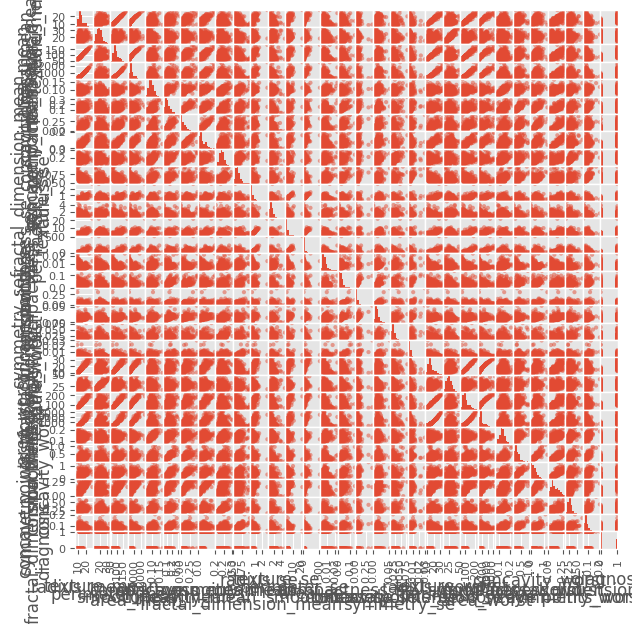

In [27]:
from pandas.plotting import scatter_matrix

scatter_matrix(data,figsize=(7,7));

<strong>Корреляция наблюдается в следующих зависимостях:</strong>

— Радиус опухоли от её площади и наоборот

— Периметр опухоли от её площади и наоборот

— Радиус опухоли от её периметра и наоборот

Таким образом, следует убрать одну или несколько величин, так или иначе линейно зависящих друг от друга. Из исходного датасета будут вычленены все величины, определяющие периметр опухоли — у них (и по отношению к ним) наблюдался наибольший коэффициент корреляции, да и сама величина не является такой уж необходимой при наличии значений площади и радиуса опухоли.

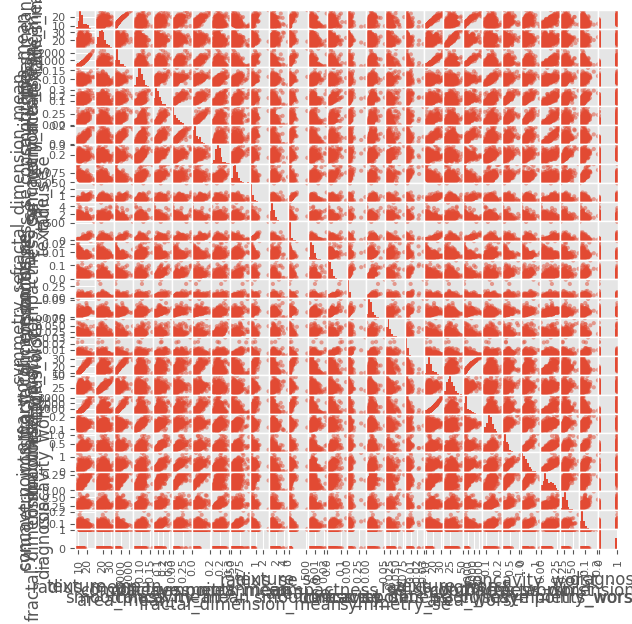

In [28]:
data = data.drop('perimeter_mean',axis=1)
data = data.drop('perimeter_se',axis=1)
data = data.drop('perimeter_worst',axis=1)

scatter_matrix(data,figsize=(7,7));

In [29]:
corr_matrix_improved = data.corr()
corr_matrix_improved

,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_mean,1.000000,0.330322,0.988806,0.159308,0.483575,0.663588,0.819619,0.134181,-0.333366,0.669193,...,0.966844,0.308934,0.939414,0.129857,0.393133,0.518021,0.733997,0.168162,-0.006500,0.724423
texture_mean,0.330322,1.000000,0.323125,-0.030452,0.220107,0.283566,0.282735,0.050209,-0.092518,0.274624,...,0.359984,0.911541,0.352314,0.079983,0.254832,0.280561,0.284927,0.098161,0.105090,0.418988
area_mean,0.988806,0.323125,1.000000,0.172688,0.476340,0.672470,0.821880,0.135380,-0.304919,0.716038,...,0.960369,0.297004,0.953869,0.135353,0.370410,0.504115,0.712762,0.149836,-0.011937,0.705724
smoothness_mean,0.159308,-0.030452,0.172688,1.000000,0.663449,0.518009,0.552482,0.593166,0.579950,0.309480,...,0.200849,0.025409,0.199214,0.804987,0.469249,0.423525,0.492425,0.417501,0.492791,0.354369
compactness_mean,0.483575,0.220107,0.476340,0.663449,1.000000,0.872845,0.818010,0.605341,0.569538,0.464512,...,0.504288,0.227264,0.478604,0.571562,0.864435,0.809360,0.803178,0.519042,0.693494,0.590348
concavity_mean,0.663588,0.283566,0.672470,0.518009,0.872845,1.000000,0.914803,0.492479,0.332844,0.605770,...,0.666534,0.279636,0.652142,0.448121,0.740759,0.882524,0.849816,0.412706,0.505172,0.684369
concave points_mean,0.819619,0.282735,0.821880,0.552482,0.818010,0.914803,1.000000,0.460601,0.148620,0.681298,...,0.820709,0.282340,0.800694,0.460466,0.655564,0.746563,0.903735,0.388114,0.357384,0.772235
symmetry_mean,0.134181,0.050209,0.135380,0.593166,0.605341,0.492479,0.460601,1.000000,0.490821,0.279407,...,0.160570,0.060257,0.149551,0.425737,0.450598,0.408218,0.415792,0.689189,0.423498,0.317472
fractal_dimension_mean,-0.333366,-0.092518,-0.304919,0.579950,0.569538,0.332844,0.148620,0.490821,1.000000,-0.016498,...,-0.278154,-0.072707,-0.256604,0.488059,0.466192,0.344312,0.165772,0.343920,0.765403,-0.019222
radius_se,0.669193,0.274624,0.716038,0.309480,0.464512,0.605770,0.681298,0.279407,-0.016498,1.000000,...,0.696718,0.188880,0.720849,0.140523,0.255466,0.355261,0.502120,0.085757,0.032421,0.556433


In [30]:
corr_matrix_Y_improved = data.corr()
corr_matrix_Y_improved['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.795777
concave points_mean        0.772235
radius_worst               0.772126
area_worst                 0.733299
radius_mean                0.724423
area_mean                  0.705724
concavity_mean             0.684369
concavity_worst            0.656475
compactness_worst          0.590853
compactness_mean           0.590348
area_se                    0.564047
radius_se                  0.556433
texture_worst              0.469415
smoothness_worst           0.439936
symmetry_worst             0.422357
texture_mean               0.418988
concave points_se          0.381360
smoothness_mean            0.354369
fractal_dimension_worst    0.324891
symmetry_mean              0.317472
compactness_se             0.270667
concavity_se               0.225150
fractal_dimension_se       0.052723
symmetry_se               -0.006316
texture_se                -0.014987
fractal_dimension_mean    -0.019222
smoothness_se             -0

In [31]:
data_prepared = data.drop('diagnosis',axis=1)
Y_labels = data['diagnosis'].copy()
data_prepared

,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,fractal_dimension_se,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
36,14.250,21.72,633.0,0.09823,0.10980,0.13190,0.055980,0.1885,0.06125,0.2860,...,0.004022,15.890,30.36,799.6,0.14460,0.4238,0.5186,0.14470,0.3591,0.10140
19,13.540,14.36,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,...,0.002300,15.110,19.26,711.2,0.14400,0.1773,0.2390,0.12880,0.2977,0.07259
388,11.270,15.50,392.0,0.08365,0.11140,0.10070,0.027570,0.1810,0.07252,0.3305,...,0.012330,12.040,18.93,450.0,0.11020,0.2809,0.3021,0.08272,0.2157,0.10430
148,14.440,15.18,640.1,0.09970,0.10210,0.08487,0.055320,0.1724,0.06081,0.2406,...,0.002528,15.850,19.85,766.9,0.13160,0.2735,0.3103,0.15990,0.2691,0.07683
412,9.397,21.68,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,0.1186,...,0.004583,9.965,27.99,301.0,0.10860,0.1887,0.1868,0.02564,0.2376,0.09206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,16.300,15.70,819.8,0.09427,0.06712,0.05526,0.045630,0.1711,0.05657,0.2067,...,0.002569,17.320,17.76,928.2,0.13540,0.1361,0.1947,0.13570,0.2300,0.07230
287,12.890,13.12,515.9,0.06955,0.03729,0.02260,0.011710,0.1337,0.05581,0.1532,...,0.002081,13.620,15.54,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
132,16.160,21.54,809.8,0.10080,0.12840,0.10430,0.056130,0.2160,0.05891,0.4332,...,0.002373,19.470,31.68,1175.0,0.13950,0.3055,0.2992,0.13120,0.3480,0.07619
380,11.270,12.96,386.3,0.12370,0.11110,0.07900,0.055500,0.2018,0.06914,0.2562,...,0.003721,12.840,20.53,476.1,0.16100,0.2429,0.2247,0.13180,0.3343,0.09215


In [32]:
Y_labels

36     1
19     0
388    0
148    0
412    0
      ..
508    0
287    0
132    1
380    0
6      1
Name: diagnosis, Length: 455, dtype: int64

# Восстановление пропущенных значений

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [34]:
data_num = data_prepared
imputer.fit(data_num)
imputer.statistics_ == data_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [35]:
X = imputer.transform(data_num)

In [36]:
data_refilled = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_prepared = data_refilled
data_prepared

,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,fractal_dimension_se,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
36,14.250,21.72,633.0,0.09823,0.10980,0.13190,0.055980,0.1885,0.06125,0.2860,...,0.004022,15.890,30.36,799.6,0.14460,0.4238,0.5186,0.14470,0.3591,0.10140
19,13.540,14.36,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,...,0.002300,15.110,19.26,711.2,0.14400,0.1773,0.2390,0.12880,0.2977,0.07259
388,11.270,15.50,392.0,0.08365,0.11140,0.10070,0.027570,0.1810,0.07252,0.3305,...,0.012330,12.040,18.93,450.0,0.11020,0.2809,0.3021,0.08272,0.2157,0.10430
148,14.440,15.18,640.1,0.09970,0.10210,0.08487,0.055320,0.1724,0.06081,0.2406,...,0.002528,15.850,19.85,766.9,0.13160,0.2735,0.3103,0.15990,0.2691,0.07683
412,9.397,21.68,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,0.1186,...,0.004583,9.965,27.99,301.0,0.10860,0.1887,0.1868,0.02564,0.2376,0.09206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,16.300,15.70,819.8,0.09427,0.06712,0.05526,0.045630,0.1711,0.05657,0.2067,...,0.002569,17.320,17.76,928.2,0.13540,0.1361,0.1947,0.13570,0.2300,0.07230
287,12.890,13.12,515.9,0.06955,0.03729,0.02260,0.011710,0.1337,0.05581,0.1532,...,0.002081,13.620,15.54,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
132,16.160,21.54,809.8,0.10080,0.12840,0.10430,0.056130,0.2160,0.05891,0.4332,...,0.002373,19.470,31.68,1175.0,0.13950,0.3055,0.2992,0.13120,0.3480,0.07619
380,11.270,12.96,386.3,0.12370,0.11110,0.07900,0.055500,0.2018,0.06914,0.2562,...,0.003721,12.840,20.53,476.1,0.16100,0.2429,0.2247,0.13180,0.3343,0.09215


# Масштабирование признаков

В полученном наборе данных качественные данные отсутствуют. Отсюда, будет создан только один pipeline — для количественных признаков:

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [38]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

data_scaled = pipeline.fit_transform(data_prepared)
data_scaled

array([[ 0.0415877 ,  0.61244898, -0.05475097, ...,  0.45772321,
         1.08929491,  0.9910051 ],
       [-0.1629726 , -1.14675602, -0.24797937, ...,  0.21481865,
         0.11370008, -0.61375235],
       [-0.81698932, -0.87427046, -0.75292256, ..., -0.48914625,
        -1.18921157,  1.15253917],
       ...,
       [ 0.59188371,  0.56942495,  0.45743467, ...,  0.25148349,
         0.91292516, -0.41322729],
       [-0.81698932, -1.4813874 , -0.76943533, ...,  0.2606497 ,
         0.69524358,  0.47576711],
       [ 1.19404008,  0.19654997,  1.1243189 , ...,  1.19865849,
         0.25034691,  0.00397622]])

# Обучение модели

## Линейная регрессия

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_prepared,Y_labels)

LinearRegression()

In [40]:
some_data = data_prepared.iloc[:5]
data_labels = Y_labels.iloc[:5]
data_prepared_some = pipeline.fit_transform(some_data)
print("Прогнозы:", model.predict(data_prepared_some))
print("Метки:",list(data_labels))

Прогнозы: [  2.75675724  15.54801087  -2.71968125  -5.41889812 -19.96725085]
Метки: [1, 0, 0, 0, 0]


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Среднеквадратичная ошибка

In [41]:
from sklearn.metrics import mean_squared_error

data_prepared_square = pipeline.fit_transform(data_prepared)
data_predictions = model.predict(data_prepared_square)
linear_mse = mean_squared_error(Y_labels, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

13.121873215240424


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Дерево принятия решений

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(data_prepared,Y_labels)

DecisionTreeRegressor()

In [43]:
data_predictions = tree_regressor.predict(data_prepared)
linear_mse = mean_squared_error(Y_labels, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

0.0


## Перекрёстная валидация

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_regressor, data_prepared, Y_labels, scoring='neg_mean_squared_error')
scores = np.sqrt(-scores)

In [45]:
def display_scores(scores):
    print("Оценки:",scores)
    print("Среднее:", scores.mean())
    print("Стандартное отклонение:",scores.std())

display_scores(scores)

Оценки: [0.29649973 0.29649973 0.2567763  0.2567763  0.20965697]
Среднее: 0.263241802337272
Стандартное отклонение: 0.032146910145376906


In [46]:
lin_scores = cross_val_score(tree_regressor, data_prepared, Y_labels, scoring='neg_mean_squared_error', cv=10)
scores = np.sqrt(-lin_scores)

display_scores(scores)

Оценки: [0.29488391 0.29488391 0.25537696 0.25537696 0.29488391 0.33333333
 0.25819889 0.1490712  0.2981424  0.1490712 ]
Среднее: 0.25832226724650703
Стандартное отклонение: 0.05925497564208432


## Случайный лес и GridSearchCV

In [47]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(data_prepared,Y_labels)
forest_rmse = mean_squared_error(Y_labels, forest_model.predict(data_prepared))
print(np.sqrt(forest_rmse))
forest_rmse_scores = cross_val_score(model, data_prepared,Y_labels,scoring='neg_mean_squared_error')
display_scores(np.sqrt(-forest_rmse_scores))

0.07086436510516582
Оценки: [0.26928328 0.21290369 0.29651739 0.226122   0.27011262]
Среднее: 0.25498779460579174
Стандартное отклонение: 0.030861415318391688


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators':[2,10,20], 'max_features':[2,4,6]
    }, 
    {
        'n_estimators':[3,15,30],'max_features':[3,5,7],'bootstrap':[False] 
    }
]

regressor = RandomForestRegressor()
grid_search = GridSearchCV(regressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [2, 10, 20]},
                         {'bootstrap': [False], 'max_features': [3, 5, 7],
                          'n_estimators': [3, 15, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
cv_res = grid_search.cv_results_

for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

0.23673604720015928 {'max_features': 2, 'n_estimators': 2}
0.19706639702182824 {'max_features': 2, 'n_estimators': 10}
0.17819300562240722 {'max_features': 2, 'n_estimators': 20}
0.253546276418555 {'max_features': 4, 'n_estimators': 2}
0.18851647550933456 {'max_features': 4, 'n_estimators': 10}
0.18594871087728218 {'max_features': 4, 'n_estimators': 20}
0.24133329285815133 {'max_features': 6, 'n_estimators': 2}
0.20272863906932612 {'max_features': 6, 'n_estimators': 10}
0.16964733944338703 {'max_features': 6, 'n_estimators': 20}
0.21821789023599242 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.18237344450350568 {'bootstrap': False, 'max_features': 3, 'n_estimators': 15}
0.17456731788553226 {'bootstrap': False, 'max_features': 3, 'n_estimators': 30}
0.22753121054143707 {'bootstrap': False, 'max_features': 5, 'n_estimators': 3}
0.18005561479727428 {'bootstrap': False, 'max_features': 5, 'n_estimators': 15}
0.17637649817554807 {'bootstrap': False, 'max_features': 5, 'n_esti

In [50]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 20}

## Алгоритм ближайших соседей (KNeighbors)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(data_prepared,Y_labels)

KNeighborsClassifier(n_neighbors=3)

In [62]:
param_grid = [
    {
        'n_neighbors':[1,3,5,7,9,11,13,15]
    }
]

regressor = KNeighborsClassifier()
grid_search = GridSearchCV(regressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,Y_labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
cv_res = grid_search.cv_results_

for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

0.33149677206589795 {'n_neighbors': 1}
0.3109715368056966 {'n_neighbors': 3}
0.26519741765271837 {'n_neighbors': 5}
0.2773500981126146 {'n_neighbors': 7}
0.28128433856309726 {'n_neighbors': 9}
0.28128433856309726 {'n_neighbors': 11}
0.28128433856309726 {'n_neighbors': 13}
0.2773500981126145 {'n_neighbors': 15}


In [64]:
grid_search.best_params_

{'n_neighbors': 5}

# Определение важности признаков

In [52]:
from scipy import stats

In [53]:
final_model = grid_search.best_estimator_
X_test = data.drop('diagnosis',axis=1)
Y_test = data['diagnosis'].copy()

X_transformed = pipeline.fit_transform(X_test)
final_preds = final_model.predict(X_transformed)

final_MSE=mean_squared_error(Y_test,final_preds)
final_RMSE=np.sqrt(final_MSE)

final_RMSE

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.40237618394556285

In [54]:
confidence = 0.95

squared_errors = (final_preds-Y_test) ** 2
np.sqrt(stats.t.interval(confidence,len(squared_errors) - 1,loc = squared_errors.mean(),scale = stats.sem(squared_errors)))

array([0.38472264, 0.41928711])